In [14]:
import numpy as np
import cv2
import glob
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from google.colab import files
import zipfile
import os
uploaded = files.upload()
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/road_conditions')
os.listdir('/content/road_conditions')

KeyboardInterrupt: 

In [27]:
import numpy as np
import cv2
import glob
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(folder + '/*.jpg'):
        img = cv2.imread(filename)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return np.array(images)
crack_images = load_images_from_folder('/content/road_conditions/cracks')
pothole_images = load_images_from_folder('/content/road_conditions/potholes')
crack_labels = np.zeros(len(crack_images))
pothole_labels = np.ones(len(pothole_images))
images = np.concatenate((crack_images, pothole_images), axis=0)
labels = np.concatenate((crack_labels, pothole_labels), axis=0)

In [28]:

# Check for the contents of the extracted directory
extracted_path = '/content/road_conditions'
if os.path.exists(extracted_path):
    print(f"Contents of {extracted_path}:")
    print(os.listdir(extracted_path))
else:
    print(f"The path {extracted_path} does not exist.")

Contents of /content/road_conditions:
['cracks', 'road_trafifc.mp4', 'dhaka_traffic.mp4', 'potholes', 'british_highway_traffic.mp4', '.ipynb_checkpoints', 'traffic_detection.mp4', 'traffic_video.avi']


In [29]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set paths
base_folder_path = '/content/road_conditions'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    base_folder_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_folder_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 312 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [30]:
#Training the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [31]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming three classes: Cracks, Normal, Potholes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
9/9 [==============================] - 27s 3s/step - loss: 0.7003 - accuracy: 0.7500 - val_loss: 0.5159 - val_accuracy: 0.8281
Epoch 2/10
9/9 [==============================] - 25s 3s/step - loss: 0.4561 - accuracy: 0.8500 - val_loss: 0.4254 - val_accuracy: 0.8438
Epoch 3/10
9/9 [==============================] - 25s 3s/step - loss: 0.3522 - accuracy: 0.8500 - val_loss: 0.3310 - val_accuracy: 0.8750
Epoch 4/10
9/9 [==============================] - 25s 3s/step - loss: 0.3159 - accuracy: 0.8500 - val_loss: 0.4587 - val_accuracy: 0.7812
Epoch 5/10
9/9 [==============================] - 25s 3s/step - loss: 0.2235 - accuracy: 0.8857 - val_loss: 0.7455 - val_accuracy: 0.7656
Epoch 6/10
9/9 [==============================] - 25s 3s/step - loss: 0.1531 - accuracy: 0.9429 - val_loss: 0.5867 - val_accuracy: 0.7969
Epoch 7/10
9/9 [==============================] - 25s 3s/step - loss: 0.1402 - accuracy: 0.9429 - val_loss: 0.9611 - val_accuracy: 0.7812
Epoch 8/10
9/9 [==================

In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

3/3 [==============================] - 2s 523ms/step - loss: 1.3942 - accuracy: 0.7949
Validation Accuracy: 0.79


Total images found in /content/road_conditions/cracks: 330
1/1 [==============================] - 0s 83ms/step


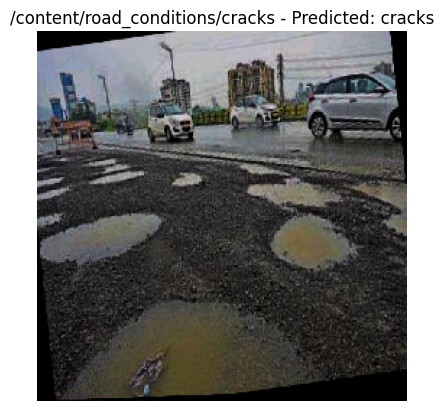

1/1 [==============================] - 0s 39ms/step


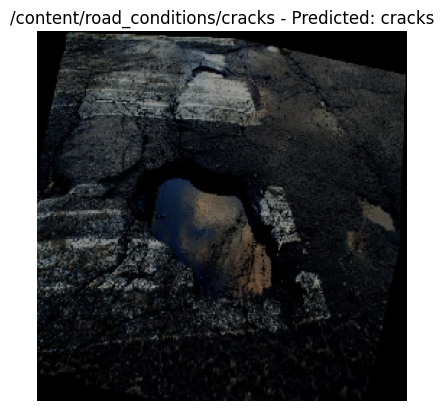

1/1 [==============================] - 0s 37ms/step


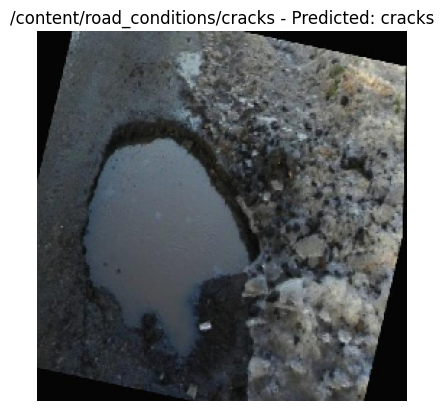

1/1 [==============================] - 0s 39ms/step


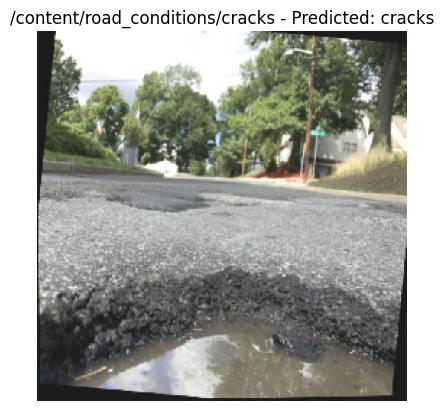

1/1 [==============================] - 0s 45ms/step


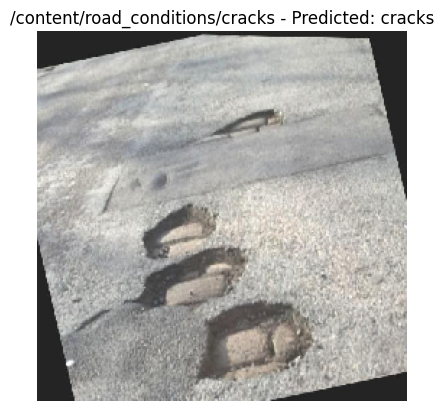

Total images found in /content/road_conditions/potholes: 61
1/1 [==============================] - 0s 46ms/step


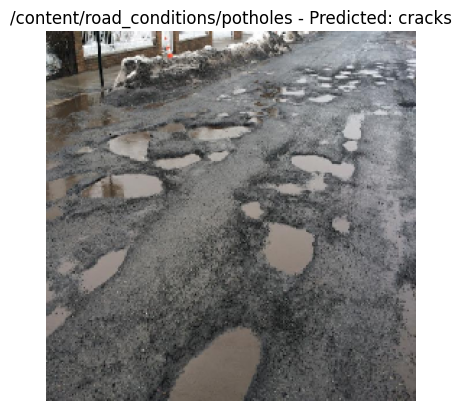

1/1 [==============================] - 0s 43ms/step


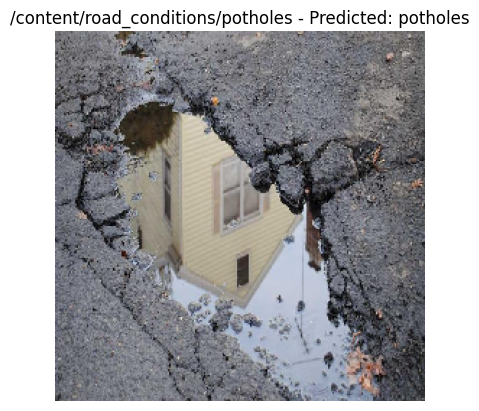

1/1 [==============================] - 0s 49ms/step


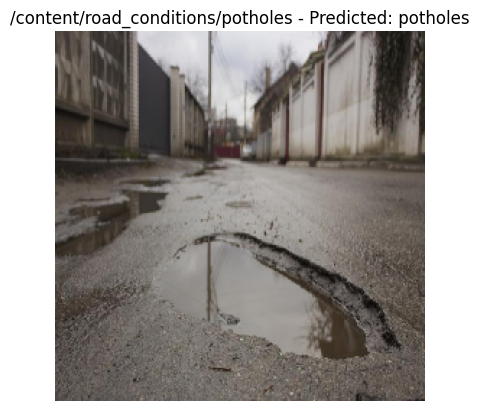

1/1 [==============================] - 0s 54ms/step


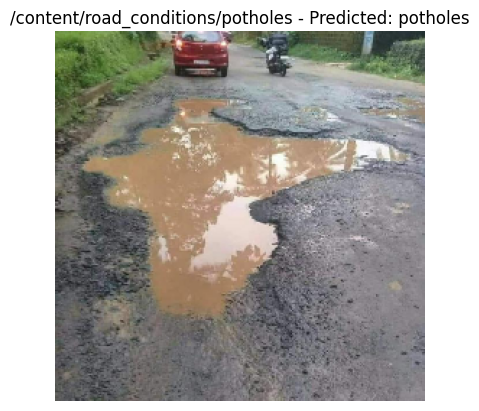

1/1 [==============================] - 0s 48ms/step


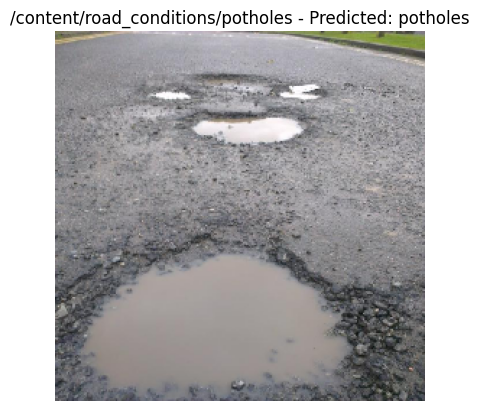

In [33]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_predict_images_from_folder(base_folder_path, model, target_size=(256, 256), num_images=5):
    """
    Load images from subfolders and predict their classes using the trained model.

    Parameters:
    base_folder_path (str): Path to the base folder containing subfolders.
    model (tf.keras.Model): The trained model for prediction.
    target_size (tuple): The target size for the images (default is (256, 256)).
    num_images (int): Number of images to display from each subfolder.

    Returns:
    None
    """
    subfolders = ['/content/road_conditions/cracks', '/content/road_conditions/potholes']

    for subfolder in subfolders:
        folder_path = os.path.join(base_folder_path, subfolder)
        if os.path.exists(folder_path):
            images = [img for img in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, img))]
            print(f"Total images found in {subfolder}: {len(images)}")

            # Display and predict the first num_images images
            for i, image_name in enumerate(images[:num_images]):
                img_path = os.path.join(folder_path, image_name)
                img = image.load_img(img_path, target_size=target_size)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array /= 255.0  # Normalize the image

                # Predict the class
                predictions = model.predict(img_array)
                class_indices = train_generator.class_indices
                class_labels = list(class_indices.keys())
                predicted_class = class_labels[np.argmax(predictions)]

                # Display the image with the predicted class
                plt.figure()
                plt.imshow(img)
                plt.title(f"{subfolder} - Predicted: {predicted_class}")
                plt.axis('off')  # Hide axes for better visualization
                plt.show()
        else:
            print(f"The folder {folder_path} does not exist.")

# Set the base folder path to the Training directory
base_folder_path = '/content/road_conditions'

# Call the function to load, predict, and display images
load_and_predict_images_from_folder(base_folder_path, model)